# Numerical Methods II Numerical Differentiation

## Contents
## I.    Differentiation - the continuous definition
## II.   Forward Difference Method FDM
## III.  Taylor Series to estimate Accuracy
## IV.  Central Difference Method   CDM
## V.   Approximating Second Derivatives
## VI.  Numerical Methods for ODEs
## VII.  Euler Method
## VIII. Heun Method

In [1]:
## Ok, so let's start with importing our libraries
## This is neccesary to do at the beginning of every notebook
## This cell must be run to import the libraries
## If you ever later encounter Nameerror: {library_name} not found
## Run this cell

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## I. Differentiation (or taking a derivative) - the continuous definition


The classical definition of the derivative of a function $f$ at a point $x_0$ is of course given by:

 $$f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}. $$
 
 
**Notation** 
 
1. Note that the following are all equivalent mathematical ways of writing the derivative of the function $f$ with respect to (w.r.t.) $x$ and evaluated at the location $x_0$:
 
 $$  f'(x_0) = \frac{df}{dx}(x_0) = \left.\frac{df}{dx}\right|_{x_0}. $$
 
 
2. We're using $h$ here to denote a small (potentially infinitesimally small) increment to the $x$ coordinate, as is common. But note that in the literature $\Delta x$ is commonly used to mean the same thing. Also, of course for finite $h$ there is significant overlap here with the mesh spacing in a numerical approximation, as we shall see below, and so $\Delta x$ is also used.

Hopefully, the definition of differentiation, and what is said above should be clear from A Level Mathematics, or 1st Year Math Methods 1, so I would not go into detail to explain what is differentiation. 

To find the 1st derivative, you will differentiate a function once. To find the 2nd derivative, you will differentiate a function twice. While for many functions, there are analytical solutions, there are also many important functions that do not have analytical solutions. However, finding the differentiation of these function could be important for studying the change of these functions, so numerical differentiation is neccesary. 

There are several different ways that numerical differentiation can be done, and each with their merits and demerits. Higher order accuracy in the numerical differentiation would require more sophisticated methods of numerical differentiation. 

One of the popular ways to do Numerical Differentiation is through Finite Difference. To evaluate the derivative at a point termed $x_0$, the finite difference method uses point or points around the point $x_0$ to find the derivative at the point $x_0$. 

## II.  Forward Difference Method FDM

The forward difference is a method of finding the derivative at a point. The forward difference works by taking the gradient between a point $x_0$ and a point in front of $x_0$. As the point in front of $x_0$ becomes closer and closer to $x_0$, then the gradient between $x_0$ and the point in front of $x_0$ becomes closer and closer to the derivative of the function at $x_0$. Because this method uses a point in front of $x_0$, it has Forward in its name, and because it uses the difference between $x_0$ and the point in front of $x_0$, it has Difference in its name. 
 
For example, we can turn the formal definition of a derivative given above into an approximation rule by replacing the limit as $h$ approaches zero (i.e. the $\text{lim}_{h\rightarrow\infty}$) with a small but finite $\Delta x$ value:

$$ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\;\;\;\; \Delta x>0. $$

Since this approximate gradient method uses values of $x$ greater than $x_0$ ($\Delta x>0$), this algorithm is known as the **forward difference method**. 

The figure below illustrates this approximation. 

In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line -- if the second (and/or higher) derivative of the function is large then this approximation might not be very good, unless you make $\Delta x$ very small.

You can see this yourself by varying the value of $\Delta x$ in the code below.

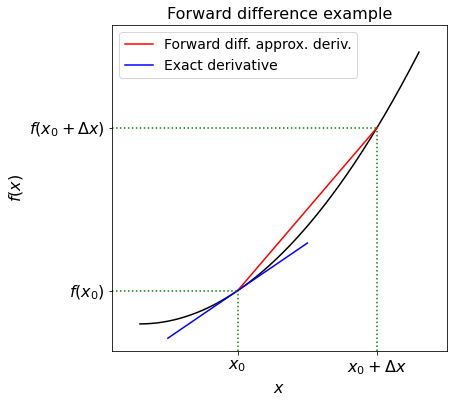

In [2]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
x0 = 0.35
dx = 0.5
x1 = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
# plot a line representing the exact derivative (given by function f(.)) at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((x0, x1))
ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
ax1.set_yticks((f(x0), f(x1)))
ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')
ax1.legend(loc='best', fontsize=14);

## III.  Taylor series to estimate accuracy

As previously discussed, there are many different methods that are possible to use for Numerical Differentiation. However, how do we know if a method is a good method, or it is a bad method. Also, what is exactly a good method, and what is exactly a bad method. 

Ultimately, all methods of numerical differentiation will move closer to the derivative of the function at the point $x_0$ as the $\Delta x$ used becomes smaller and smaller. What <span class="pun">differentiates</span> a good method from a bad  method is how accurate the estimate for the derivative is, given that all methods have the same $\Delta x$ in their equation, for the sake of fair comparison. For the same $\Delta x$, a good method will result in a more accurate derivative of the function at point $x_0$, while a bad method will result in a less accurate derivative of the function at point $x_0$. Thus, what makes a method good/bad is the accuracy of the method. 



We can use a [Taylor series expansion](http://mathworld.wolfram.com/TaylorSeries.html), or *Taylor series analysis*, to estimate the accuracy of the method. 

Recall that Taylor series in one dimension tells us that we can approximate the value of the function at a location in terms of the value of the function at a nearby point, so $f(x_0)$, and value of its derivatives $ hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots $, at a nearby point:

\begin{align*}
f(x_0+h) & = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\[5pt]
& = f(x_0)+hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3),
\end{align*}
 
<span style="color:red"> where $\mathcal{O}(h^3)$ represents the collection of terms that are third-order in $h$ or higher.</span>

We call this the Taylor series expansion *about (or around) the point $x_0$* (since all the functions in the expansion on the RHS are evaluated at this point).

An equivalent way of writing this expansion would of course be (The point nearby to $x_0$, so $x_0+h$, could be defined as $x$)

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4).$$


#### Taylor series example

*Wikipedia image: The exponential function (in blue), and the sum of the first (n + 1) terms of its Taylor series expansion around the point 0 (in red).*

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>

As can be seen, more terms in the Taylor series means that the function resulting from the Taylor series better match with the actual function. It also means that the Taylow series better match with the function at greater distance away form point 0. Of course, if we are very close to the point 0, then the function obtained from Taylor series with more terms has very little difference to the function obtained from Taylor series with fewer terms; however, if we move further awaty from the point 0, then the function obtained from Taylor series with more terms remains accurate, while the numerical derivative from the Taylor series with less terms deviates significantly.  

For the same $\Delta x$, a good method will result in a more accurate derivative of the function at point $x_0$, while a bad method will result in a less accurate derivative of the function at point $x_0$. Thus, what makes a method good/bad is the accuracy of the method. Of course, if the $\Delta x$ is super small, then numerical derivative obtained from  good method has very little difference to a bad method; however, if the $\Delta x$ becomes larger, then the numerical derivative from a good method remains accurate, while the numerical derivative from the bad method becomes inaccurate.  


Noticing the intentional wording of the 2 pargraphs, you should begin to see how the Taylor series, and the accuracy of the Numerical Differentiation relate to one another. Essentially, a better Numerical Differentiation method will have a higher order of accuracy, while a worse Numerical Differentiation method will have a lower order of accuracy. 

Let us begin by proving why the Forward Difference method previously introduced is only 1st order accurate. 

To do this, we need the Forward Difference method, and the Taylor series. 

We also state that Forward Difference method is a Numerical Differentiation method, that has a certain order of accuracy when finding the numerical derivative at the point $x_0$. The Taylor series is exact, meaning that the left hand side of the Taylor series is exactly equal to the right hand side of the Taylor series. It should also be noted that moving terms form left hand side of the Taylor series to the right hand side of the Taylor series does not affec the equality of the Taylor series. 

To find the accuracy of a Numerical differentiation method, we need a comparison between the Numerical differentiation method and something exact; thus, we will compare the Forward Difference Method which is an estimate to the Taylor series which is exact, to understand how much does the estimate, i.e. the Forward Difference Method, differe from the exact, i.e. the Taylor series. 

Making a comparison means finding both similarities and differences. 

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\;\;\;\; \Delta x>0. $$

Taylor Series
$$ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots $$

Since both $h$ and $\Delta x$ refer to very small numbers, by assuming that $h > 0$ we could say that $h \approx \Delta x$, and thus rewrtite as:

Note: You will see later that the assumption here is okay. 

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0. $$

Taylor Series
$$ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots $$

To make comparisons, we take the common parts out, and find the parts that are different
Knowing that the equality relation in the Taylor series does not change when moving terms around...

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0. $$

Taylor Series
$$\frac {f(x_0+h) - f(x_0)}{h}= f'(x_0) + \frac{h^1}{2!}f''(x_0) + \frac{h^2}{3!}f'''(x_0) + \ldots $$

Making the same thing appear on the LFH of both the Forward Difference Method and the Taylor Series

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0. $$

Taylor Series
$$  f'(x_0) =  \frac {f(x_0+h) - f(x_0)}{h}   - \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$$

We see that there are differences between the Forward Difference Method and the Taylor series for how the derivative of the function at the point $x_0$, i.e. $f'(x_0)$ is defined. The Taylor series have several extra terms $- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$ compared to the Forward Difference Method. We can see that the Forward Difference method is the same as a Taylor series if the rest of the terms from the Taylor series $- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$ are removed. 

Thus, understanding that the Taylor series is exact, while the Forward Difference Method is but an approximation for the derivative of the function, you note that the extra terms in the Taylor series represent the difference between the approximation of the Forward Difference Method and the exactness of the Taylor series.

The extra terms of the Taylor series, i.e. $- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$, start from the term that includes 2nd derivative of the function $- \frac{h^1}{2!}f''(x_0)$ and continue onwards to terms that include higher derivatives, like the 3rd, 4th, etc. i.e.  $- \frac{h^2}{3!}f'''(x_0) + \ldots$. These extra terms are the difference between the Taylor series and the Forward Difference Method. 

To make a comparison, we need not only the differences, but also the similarities. The Taylor series and the Forward Difference method are similar up to, and not including the 2nd derivative of the function, i.e. the Forward Difference Method does not have the terms $- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$. Thus, because the similarity between the Taylor series and the Forward Difference method does not include the 2nd derivative, or any other higher derivative, we say that the Forward Difference is only 1st order accurate. 

<span style="color:red"> Remembering from above that $\mathcal{O}(h^3)$ represents the collection of terms that are third-order in $h$ or higher.</span>

$$\mathcal{O}(h^3) = \frac{h^3}{3!}f'''(x_0) + \frac{h^4}{4!}f''''(x_0) + \frac{h^5}{5!}f'''''(x_0) + \ldots $$

We could extend such a definition to $h^2$ or $h^4$ or to some other $h^n$

<span style="color:red"> Then $\mathcal{O}(h^2)$ represents the collection of terms that are second-order in $h$ or higher.</span>

$$\mathcal{O}(h^2) = \frac{h^2}{2!}f''(x_0)+\frac{h^3}{3!}f'''(x_0) + \frac{h^4}{4!}f''''(x_0) + \frac{h^5}{5!}f'''''(x_0) + \ldots $$

<span style="color:red"> Then $\mathcal{O}(h^4)$ represents the collection of terms that are forth-order in $h$ or higher.</span>

$$\mathcal{O}(h^4) =  \frac{h^4}{4!}f''''(x_0) + \frac{h^5}{5!}f'''''(x_0) + \ldots $$

The expression introduced before can help us. 

Knowing that the difference between the Forward Difference Method and the Taylor series is expressed by 

$$- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots $$

$$\mathcal{O}(h^2) = \frac{h^2}{2!}f''(x_0)+\frac{h^3}{3!}f'''(x_0) + \frac{h^4}{4!}f''''(x_0) + \frac{h^5}{5!}f'''''(x_0) + \ldots $$

I could express the difference between the Forward Difference Method (henceforth known as FDM because I made too many typing mistakes) and the Taylor series using the expression introduced above



$$- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots = -\frac{\mathcal{O}(h^2)}{h} $$

I could also express the Taylor series and the FDM as:

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0. $$

Taylor Series
$$  f'(x_0) =  \frac {f(x_0+h) - f(x_0)}{h}   - \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots$$

Forward Difference Method
$$ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0. $$

Taylor Series
$$  f'(x_0) =  \frac {f(x_0+h) - f(x_0)}{h}   - \mathcal{O}(h)$$

Immediately, I could see that the the difference in FDM and the Taylor Series is \mathcal{O}(h), and that the FDM does not include 2nd order terms, so FDM can only be 1st order accurate. 

In the future(heh, NM2), when I see that the difference between the numerical differentiation method and Taylor series is \mathcalc{O}{h^n}, I will know that the order of accuracy of the numerical differentiation method is $n$


### What does order of accuracy mean?

As previously discussed, there are many different methods that are possible to use for Numerical Differentiation. However, how do we know if a method is a good method, or it is a bad method. Also, what is exactly a good method, and what is exactly a bad method. 

Ultimately, all methods of numerical differentiation will move closer to the derivative of the function at the point $x_0$ as the $\Delta x$ used becomes smaller and smaller. What <span class="pun">differentiates</span> a good method from a bad  method is how accurate the estimate for the derivative is, given that all methods have the same $\Delta x$ in their equation, for the sake of fair comparison. For the same $\Delta x$, a good method will result in a more accurate derivative of the function at point $x_0$, while a bad method will result in a less accurate derivative of the function at point $x_0$. Thus, what makes a method good/bad is the accuracy of the method. 

For the same $\Delta x$, a good method will result in a more accurate derivative of the function at point $x_0$, while a bad method will result in a less accurate derivative of the function at point $x_0$. Thus, what makes a method good/bad is the accuracy of the method. Of course, if the $\Delta x$ is super small, then numerical derivative obtained from  good method has very little difference to a bad method; however, if the $\Delta x$ becomes larger, then the numerical derivative from a good method remains accurate, while the numerical derivative from the bad method becomes inaccurate.  

In other words, the error increases if $\Delta x$ increase, while the error decreases if the $\Delta x$ decreases. 

1st order accuracy means that the error and $\Delta x$ are in a linear relationship. As we make the spacing smaller we expect the error in our derivative to fall linearly, meaning that if we made the spacing 2 times smaller, the error becomes 2 times smaller. 

2nd order accuracy means that as we make the spacing smaller we expect the error in our derivative to fall linearly, meaning that if we made the spacing 2 times smaller, the error becomes 4 times smaller. 

3rd order accuracy means that as we make the spacing smaller we expect the error in our derivative to fall linearly, meaning that if we made the spacing 2 times smaller, the error becomes 8 times smaller. 

## <span style="color:blue">Exercise 2.1: Compute first derivative using forward differencing</span>

Use the forward difference scheme to compute an approximation to $f'(2.36)$ from the following data:

$f(2.36) = 0.85866$

$f(2.37) = 0.86289$

You should get an answer of 0.423.

## IV. Central Difference Method CDM

In an attempt to derive a more accurate method we use two Taylor series expansions; one in the positive $x$ direction from $x_0$, and one in the negative direction. 

Since we hope to achieve better than first-order accuracy, we include an extra term in the series:

\begin{align*}
f(x_0+ \Delta x) &= f(x_0)+\Delta x f'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3)\\[5pt]
f(x_0- \Delta x) &= f(x_0)- \Delta x f'(x_0)+\frac{(-\Delta x)^2}{2}f''(x_0) + \mathcal{O}((-\Delta x)^3).
\end{align*}

Using the fact that $(-\Delta x)^2=\Delta x^2$ and the absolute value signs from the definition of $\mathcal{O}$ (that is we <span style="color:red">don't worry about signs when using the $\mathcal{O}$ notation) </span>, this is equivalent to:

\begin{align*} 
f(x_0+\Delta x) &= f(x_0)+\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3),\\[5pt]
f(x_0-\Delta x) &= f(x_0)-\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3).
\end{align*}

Remember that we are looking for an expression for $f'(x_0)$. Noticing the sign change between the derivative terms in the two equations, we subtract the second equation from the first to give: 

$\mathcal{O}(\Delta x^3)$ remains because if you look back, you will see that it had different signs, one was positive, one was negative, then we decided to ignore the signs, but double negative makes positive :). 

$$ f(x_0+\Delta x)-f(x_0-\Delta x)=2\Delta xf'(x_0) + \mathcal{O}(\Delta x^3).$$

Finally, we can rearrange to get an expression for $f'(x_0)$:

$$ f'(x_0)=\frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x} + O(\Delta x^2),$$

which, contrary to the first-order forward and backward differences seen above, is an approximation to the derivative that is second-order accurate.

By considering an interval symmetric about $x_0$, we have created a second-order approximation for the derivative of $f$. 

This symmetry gives the scheme its name: the central difference method. 

The figure below illustrates this scheme. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.  

Even without the analysis above it's hopefully clear visually why this should in general give a lower error than both the forward and backward difference approaches. 

The analysis of the two methods does tell us that as we halve $h$ the error should drop by a factor 4 rather than the 2 we get for the first-order forward or backward differencing.

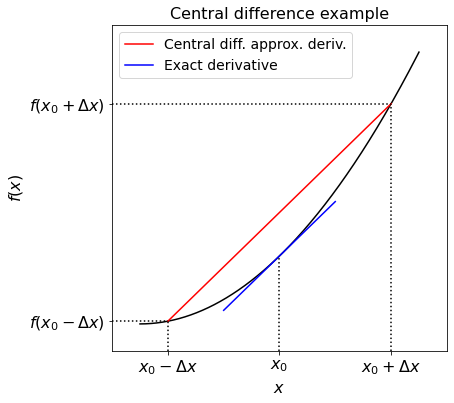

In [3]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
# ax.grid(True)
ax1.set_title('Central difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the exact solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
dx = 0.4
x0 = 0.5
xl = x0 - dx
xr = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([xl, xr], [f(xl), f(xr)], 'r', label = 'Central diff. approx. deriv.')
# plot a line representing the exact derivative at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((xl, x0, xr))
ax1.set_xticklabels(('$x_0-\Delta x$', '$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([xl, xl], [-0.1, f(xl)], 'k:')
ax1.plot([xr, xr], [-0.1, f(xr)], 'k:')
ax1.plot([x0, x0], [-0.1, f(x0)], 'k:')
ax1.set_yticks((f(xl), f(xr)))
ax1.set_yticklabels(('$f(x_0-\Delta x)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, xl], [f(xl), f(xl)], 'k:')
ax1.plot([-0.1, xr], [f(xr), f(xr)], 'k:')
ax1.legend(loc='best', fontsize=14);

## <span style="color:blue">Exercise 2.2: Compute first derivative using central differencing</span>

Use the data below to compute $f'(0.2)$ using central differencing:

$$f(0.1) = 0.078348$$
$$f(0.2) = 0.138910$$
$$f(0.3) = 0.192916$$

You should get 0.57284

## <span style="color:blue">Example: Write a function to perform numerical differentiation</span>

As covered above, the expression

$$\frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},$$

can be used to find an approximate derivative of the function $f(x)$ provided that $\Delta x$ is appropriately small. 

Let's write a function `diff(f, x, dx = 1.0e-6)` that returns the approximation of the derivative of a mathematical function represented by a Python function `f(x)`.

Let's apply the above formula to differentiate $\,f(x) = e^x\,$ at $\,x = 0$, $\,f(x) = e^{−2x}\,$ at $\,x = 0$, $\,f(x) = \cos(x)\,$ at $\,x = 2\pi$, and $\,f(x) = \ln(x)\,$ at $\,x = 1\,$, i.e. functions we know the exact derivative of.

In each case, using $\,\Delta x = 0.01$, let's write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [4]:
def diff(f, x, dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / ( 2.0 * dx )
    return derivative

dx = 0.01
x = 0
f = np.exp
derivative = diff(f, x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))
x = 0

def g(x):
    return np.exp(-2*x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

x = 2*np.pi
f = np.cos
derivative = diff(f, x, dx)
print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

x = 1
f = np.log
derivative = diff(f, x, dx)
print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.00013.  The error is 0.00013.
The approximate derivative of cos(x) at x = 2*pi is: 0.00000.  The error is 0.00000.
The approximate derivative of ln(x) at x = 0 is: 1.00003.  The error is 0.00003.


## <span style="color:blue">Exercise 2.3: Compute the derivative of $\sin(x)$</span>

Compute 

$$\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8$$

using (a) forward differencing and (b) central differencing. 

Write some code that evaluates these derivatives for decreasing values of $h$ (start with $h=1.0$ and keep halving) and compare the values against the exact solution.

Plot the convergence of your two methods.

You should get something that looks like this

Note that the plot here is logarithmic!!!

!["Convergence plot"](images/fd_cd_convergence.png)

## V.  Approximating second derivatives

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. 

That is, if we define a new function $g$ where:

$$ g(x) = f'(x), $$

then

$$ f''(x) = g'(x), $$

a consequence of this (obvious) observation is that we can just apply our differencing formula twice in order to achieve a second derivative.

And so on for even higher  derivatives!

Basically, since we have a method to numerically computer 1st derivatives. After finding the 1st derivative, we have an equation of the sort, and we will just use the method again on the equation of the sort obtained, to find the 2nd derivative!

We have noted above that the central difference method, being second-order accurate, is superior to the forward difference method so we will choose to extend that.

In order to calculate $f''(x_0)$ using a central difference method, we first calculate $f'(x)$ for each of two half intervals, one to the left of $x_0$ and one to the right:

\begin{align*} 
f'\left(x_0+\frac{\Delta x}{2}\right) & \approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\\[10pt]
f'\left(x_0-\frac{\Delta x}{2}\right) & \approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}.
\end{align*}

[NB. We make this choice since we have a vision to ultimately end up with an approximation that utilises a three-point stencil].

[NB2: Three Point Stencil basically means that the equation at the end will only use three points, namely $f(x_0+\Delta x)\;,f(x_0) \;and\; f(x_0-\Delta x)$. If we have used $\Delta x$ instead, the equation would need more point stencil.]

Of course the formula on the RHS of these two equations we recognise from above as first-order forward and backward differences, if we were to consider the derivatives on the LHS to be evaluated at $x_0$. 

However, by considering the LHS at $x_0\pm \Delta x/2$ they are in actual fact second-order *central* differences where the denominator of the RHS is $2\times (\Delta x/2)$.

[This may seem a bit weird, but is just showing that there are sometimes more than one way to interpret a numerical approximation].

[If you not believe that this is 2nd order, do try to prove this using the above workflow presented when discussing why FDM is 1st order]

We can now calculate the second derivative making use of these two values within another central difference. 

But we must note again that these two values are telling us $f'(x)$ at the points $x_0\pm{\Delta x}/{2}$, which are only $\Delta x$ rather than $2\Delta x$ apart. 

Basically, in the central difference formula, the denominator is actually the difference of the inputs into the function at the numerator. The inputs here are $x_0+\frac{\Delta x}{2}$ and $x_0-\frac{\Delta x}{2}$, so the denominator will be $(x_0+\frac{\Delta x}{2}) - (x_0-\frac{\Delta x}{2})$, which yields $\Delta x$

We must remember this in the denominator of the central difference formula to yield

\begin{align}
    f''(x_0)&\approx\frac{f'(x_0+\frac{\Delta x}{2})-f'(x_0-\frac{\Delta x}{2})}{\Delta x}\\[5pt]
    &\approx\frac{\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}-\frac{f(x_0)-f(x_0-h)}{\Delta x}}{\Delta x}\\[5pt]
    &\approx\frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{\Delta x^2}.
\end{align}

## <span style="color:blue">Exercise 2.4: Compute second derivative</span>

Calculate the second derivative $f''$ at $x = 1$ using the data below:

$f(0.84) = 0.431711$

$f(0.92) = 0.398519$

$f(1.00) = 0.367879$

$f(1.08) = 0.339596$

$f(1.16) = 0.313486$

You should get 0.36828

## Aside: Non-central differencing and differentiation by polynomial fit

In this particular case we were given more data than we actually used. An alternative approach would be to use *non-centred differencing*, e.g. the following is also a valid approximation to the second derivative

$$
\begin{align}
    f''(x_0)\approx\frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\Delta x^2}
\end{align}$$

This can come in handy if we need to approximate the value of derivatives at or near to a boundary where we don't have data beyond that boundary.

If we wanted to use all of this data, an alternative would be to fit a polynomial to this data, and then differentiate this analytical expression exactly to approximate the derivative at any point between 0.84 and 1.16 (recalling that extrapolation is dangerous).

## VI. Numerical methods for ODEs

One of the most important applications of numerical mathematics in the sciences is the numerical solution of ordinary differential equations (ODEs). While the ODEs you will encounter during your Mathematics modules are mostly solvable through analytical solutions, real world ODE are often in the form where it has been proven that no analytical solutions exists. However, many of these ODEs govern important physical processes, and thus, numerical solutions were found for these ODEs. 

To recap through an example

Suppose we have the general first-order ODE:

\begin{align}
u'(t)&=f(u(t),t) \\
u(t_0)&=u_0
\end{align}

[Notation: For $u=u(t)$, $\frac{du}{dt}=u'=\dot{u}$.]

That is, the derivative of $u$ with respect to $t$ is some known function of $u$ and $t$, and we also know the initial condition of $u$ at some initial time $t_0$.

If we manage to solve this equation analytically, the solution will be a function $u(t)$ which is defined for every $t>t_0$. In common with all of the numerical methods we will encounter in this module, our objective is to find an approximate solution to the ODE at a finite set of points. In this case, we will attempt to find approximate solutions at $t=t_0,\,t_0+\Delta t,\,t_0+2\Delta t\,,t_0+3\Delta t,\,\ldots$.

It is frequently useful to think of the independent variable, $t$, as representing time. A numerical method steps forward in time units of $\Delta t$, attempting to calculate $u(t+\Delta t)$ in using the previously calculated value $u(t)$. 

Basically, what we would like to find here is what would the value of $u$ be at each and every $t$?

## VII. Euler Method

Euler Method is one of the simplest schemes to implement to solve for ODEs. 

We will use Euler Method to solve the equatio stated beforehand, 

\begin{align}
u'(t)&=f(u(t),t) \\
u(t_0)&=u_0
\end{align}

To explain the Euler Method, let's begin with the Taylor series

In this case, we could write:

$$ u(t+\Delta t)=u(t)+\Delta t u'(t) + O(\Delta t^2) $$

Using the definition of our ODE above, we can substitute in for $u'(t)$. In this case, we know that $u'(t) =f(u(t),t)$  and we obtain:

$$ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t)+ O(\Delta t^2).$$

Notice that the value of $u$ used in the evaluation of $f$ is that at time $t$. 

By dropping the $O(\Delta t^2)$ since it is very small, we can obtain 

$$ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t).$$

Note that dropping the $O(\Delta t^2)$ causes us to lose some values, which results in Euler method being only 1st order accurate! This loss of value is referred to as the truncation error. 

This is what is known as an explicit method, because the function $f$ in this relation is evaluated at the old time level $t$
-- i.e. we have all the information required at time $t$ to explicitly compute the right-hand-side,
and hence easily find the new value for $u(t+\Delta t)$.

We will see later what does an implicit method work, so the Huen Method. 

This form of the method is therefore more correctly called either Explicit Euler or Forward Euler.  

We could also evaluate the RHS at some time between $t$ and $t+\Delta t$ (in the case of $t+h$ this method is called Implicit or Backward Euler) this is more complex to solve for the new $u(t+\Delta t)$ but can have advantageous accuracy and stability properties.

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

$$ u'(t)=u(t),$$
$$ u(0)=1.$$

Here I know that at $t = 0$, $u(t=0) = 1$

I also know that $u'(t)=u(t)$ and thus $u'(t=0)=u(t=0)$

As I know that $u(t=0)=1$, then $u'(t=0) = 1$

I can then use what I obtained to substitute into the Forward Euler scheme. 

To obtain $u(t+\Delta t)$, I have timestep $\Delta t = 0.05$ and $u(t=0) = 1$ and $u'(t=0) = 1$

$$ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t).$$

We know, of course, that the solution to this equation is $u(t)=e^t$, but let's ignore that for one moment and evaluate $u(0.1)$ using Euler's method with steps of $0.05$. The first step is:

$$\begin{align}
  u(0.05)&\approx u(0)+0.05u'(0)\\
  &\approx1+.05\times1\\
  &\approx 1.05
\end{align}$$

Here, we found that $u$ is 1.05, but actually $e^{0.05} = 1.05127$, thus we are more than the actual value by a small percentage of 0.12%. This 0.12% error comes from the truncation error, basically from us dropping $O(\Delta t^2)$ from our calculation. 



Now that we know $u(0.05)$, we can calculate the second step:

Here I know that at $t = 0.05$, $u(t=0.05) = 1.05$

I also know that $u'(t)=u(t)$ and thus $u'(t=0.05)=u(t=0.05)$.

As I know that $u(t=0.05)=1.05$, then $u'(u = 1.05, t=0.05) = 1.05$.

I can then use what I obtained to substitute into the Forward Euler scheme. 

To obtain $u(t+\Delta t)$, I have timestep $\Delta t = 0.05$ and $u(t=0.05) = 1.05$ and $u'(u=1.05, t=0.05) = 1.05$


$$
\begin{align}
  u(0.1)&\approx u(0.05)+0.05u'(0.05)\\
  &\approx 1.05+.05\times1.05\\
  &\approx 1.1025
\end{align}$$

Now the actual value of $e^{0.1}$ is around $1.1051$ so we're 0.236% higher and only 2 steps into the algorithm. The 0.236% comes from the truncation error when we went from 0 to 0.05, and the truncation error when we went from 0.05 to 0.10. Note that the truncation errors are compounded. The truncation error from 0 to 0.05 will result in greater truncation error when going from 0.05 to 0.10. These truncation errors are cumulative, and old truncation errors result in greater new truncation errors, which makes them quickly become rather significant. 

The formula given is used to calculate the value of $u(t)$ one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time $T$ then we will have to calculate $(T-t_0)/h$ steps of the method, since the distance from $T$ to $t_0$ is $T-t_0$ and the length of each step is $h$. This sum over $O(1/\Delta t)$ steps results in a global truncation error for Euler's method of $O(\Delta t)$.

In other words, Euler's method is only first-order accurate -- if we halve $\Delta t$ we will need to do double the amount of work and the error should correspondingly halve; if we had a second-order method we would expect the error to reduce by a factor of 4 for every doubling in effort!

Thus, can we do better?

## <span style="color:blue">Exercise 2.5: Implementing Forward Euler's method</span>

Write a function *euler*( *f*, *u0*, *t0*, *t_max*, *h*) that takes as arguments the function $f(u,t)$ on the RHS of our ODE,
an initial value for $u$, the start and end time of the integration, and the time step.

Use it to integrate the following ODE problems up to time $t=10$

$$u'(t)=u(t),\quad u(0)=1$$

and 

$$u'(t)=\cos(t),\quad u(0)=0$$

and plot the results. A template to get you started is below.

In [ ]:

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[u0]; t_all=[t0]
    
    
    while ... add your code here
    
    
    
    
    
    
    return(u_all,t_all)


def f(u,t):
    val = u
    return val

(u_all,t_all) = euler(f,1.0,0.0,10.0,0.1)


## VIII.  Heun's method

Euler's method is first-order accurate because it calculates the derivative using only the information available at the beginning of the time step. As we observed previously, higher-order convergence can be obtained if we also employ information from other points in the interval. Basically, the more points that we employ, the more accurate we can be. Heun's method uses 2 points compared to Euler's one single point, increasing accuracy. 


Heun's method may be derived by attempting to use derivative information at both the start and the end of the interval:

$$
\begin{align}
  u(t+\Delta t)&\approx u(t)+\frac{\Delta t}{2}\left(u'(t)+u'(t+\Delta t)\right)\\
  &\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(u(t+\Delta t),t+\Delta t)\big)
\end{align}$$

The difficulty with this approach is that we now require $u(t+\Delta t)$ in order to calculate the final term in the equation, and that's what we set out to calculate so we don't know it yet! So at this point we have an example of an implicit algorithm and at this stage the above ODE solver would be referred to as the trapezoidal method if we could solve it exactly for $u(t+\Delta t)$.

Heun's Method, unlike Euler Method, is an implicit method, meaning that we do not have all of the information needed. While we have the information about $u(t)$ and $f(u(t),t)$, we lack information about $u(t+\Delta t)$ and $f(u(t+\Delta t),t)$, and we have to deal with not knowing these things somehow. 

Perhaps the simplest solution to this dilemma, the one adopted in Heun's method, is to use a first guess at $x(t+\Delta t)$ calculated using Euler's method:

$$ \tilde{u}(t+\Delta t)=u(t)+\Delta tf(u(t),t) $$

This first guess is then used to solve for $u(t+\Delta t)$ using:

$$ u(t+\Delta t)\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(\tilde{u}(t+\Delta t),t+\Delta t)\big)$$

The generic term for schemes of this type is **predictor-corrector**. The initial calculation of $\tilde{u}(t+\Delta t)$ is used to predict the new value of $u$ and then this is used in a more accurate calculation to produce a more correct value. 

Note that Heun's method is $O(\Delta t^2)$, i.e. a second-order method.

## <span style="color:blue">Exercise 2.6: Implementing Heun's method</span>

Repeat the previous exercise for this method.

For some ODEs you know the exact solution to compare the errors between Euler's and Heun's method, and how they vary with time step.

You should be able to get a plot that looks like this for the case $u'=u$.

!["Comparison between the Euler and Heun method for the solution of a simple ODE."](images/euler_vs_heun.png)